<b>IMPORTING LIBRARIES</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib 
%matplotlib inline

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics


In [2]:
data_df = pd.read_csv('../Dataset/diabetes.csv')
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b>DATA ANALYSIS</b>

In [3]:
data_df.info() #Features present in the dataset along with their datatypes and data shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

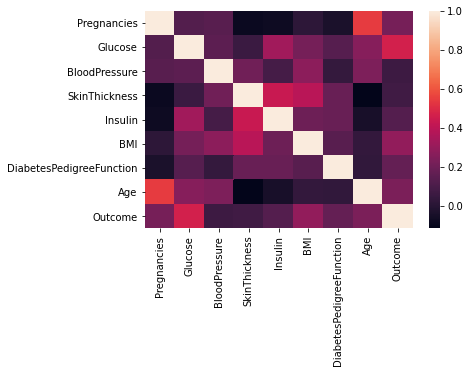

In [4]:
#First,we will analyse the heat map : Get an idea of the features dependancy among each other
corr = data_df.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
#We can observe that {Age,Pregnancy} {Glucose,Outcome} {Insulin,SkinThickness} {BMI,SkinThickness} are highly correlated among each other. We can infer that Glucose #is one feature which will highly contribute to the target variable.

/home/arathi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arathi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='Glucose', ylabel='Density'>,
 <AxesSubplot:xlabel='Glucose', ylabel='Density'>)

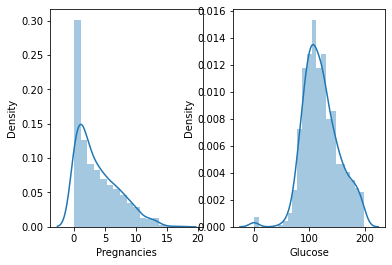

In [5]:
#Now we will analyse the distribution of the various input features. We will be using matplotlib.pyplot for the same
#FEATURES : 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
plt.figure(1)
plt.subplot(121), sns.distplot(data_df['Pregnancies'])
plt.subplot(122), sns.distplot(data_df['Glucose'])


/home/arathi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arathi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>,
 <AxesSubplot:xlabel='SkinThickness', ylabel='Density'>)

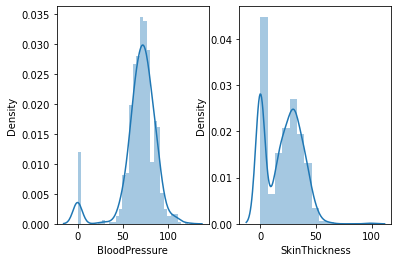

In [6]:
plt.subplot(121), sns.distplot(data_df['BloodPressure'])
plt.subplot(122), sns.distplot(data_df['SkinThickness'])

/home/arathi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arathi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='BMI', ylabel='Density'>,
 <AxesSubplot:xlabel='BMI', ylabel='Density'>)

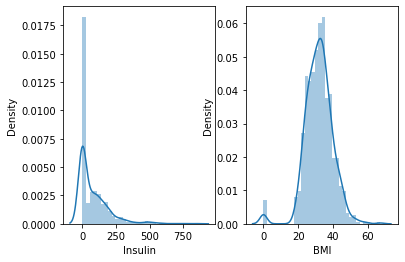

In [7]:
plt.subplot(121), sns.distplot(data_df['Insulin'])
plt.subplot(122), sns.distplot(data_df['BMI'])

/home/arathi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arathi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='Age', ylabel='Density'>,
 <AxesSubplot:xlabel='Age', ylabel='Density'>)

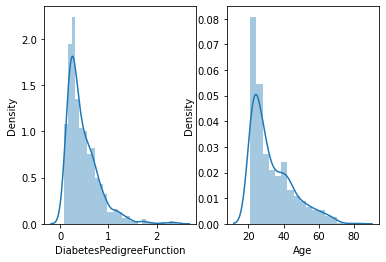

In [8]:
plt.subplot(121), sns.distplot(data_df['DiabetesPedigreeFunction'])
plt.subplot(122), sns.distplot(data_df['Age'])

Target variable with value zero : 500
Target variable with value one : 268


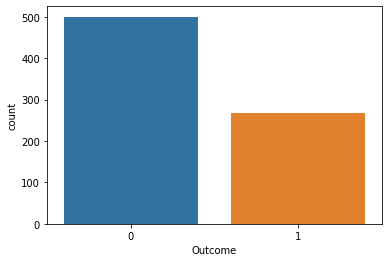

In [9]:
#Analysing the 'Outcome' variable : Whether the person has diabetes or not
sns.countplot(x = 'Outcome',data = data_df)
print("Target variable with value zero : "+ format(len(data_df.loc[data_df['Outcome']==0])))
print("Target variable with value one : "+ format(len(data_df.loc[data_df['Outcome']==1])))

<b>DATA CLEANING</b>

In [10]:
#First Check for null values 
data_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#Next check for invalid data : for example having zero or negative values in certain columns where it wont make sense
print("Number of entries with zero or negative values")
print("Pregnancies : " + format(len(data_df.loc[data_df['Pregnancies']<=0])))
print("Glucose : "+ format(len(data_df.loc[data_df['Glucose']<=0])))
print("BloodPressure : "+format(len(data_df.loc[data_df['BloodPressure']<=0])))
print("SkinThickness : "+format(len(data_df.loc[data_df['SkinThickness']<=0])))
print("Insulin : "+format(len(data_df.loc[data_df['Insulin']<=0])))
print("BMI : "+format(len(data_df.loc[data_df['BMI']<=0])))
print("DiabetesPedigreeFunction : "+format(len(data_df.loc[data_df['DiabetesPedigreeFunction']<=0])))
print("Age : "+format(len(data_df.loc[data_df['Age']<=0])))

Number of entries with zero or negative values
Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


In [12]:
#Looking at the columns, It is sensible to have values for Pregnancies as 0. So we take the rest of the columns and fill the invalid values with the mean of the respective columns
feature_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for col in feature_column:
    val = data_df[col].mean()
    data_df[col] = data_df[col].replace(0, val)

<b>MODEL CREATION</b>

In [13]:
#First we will split the data into train and test sets. Ideally we can take 80-20% in this case.
features = data_df.drop('Outcome',axis=1)
output = data_df['Outcome']
data_df_XTrain, data_df_XTest, data_df_YTrain, data_df_YTest = train_test_split(features,output,test_size = 0.8,random_state = 1)

In [14]:
#There are several models available, any model can be deployed and compared with others using accuracy metrics. Here are a list of 7 models available for classification. Use any model according to the requirement.
model = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2 )
# RandomForestClassifier(n_estimators=200)
# DecisionTreeClassifier()
# XGBClassifier(gamma=0)
# SVC()
# LogisticRegression()
# GaussianNB() 
# KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

model.fit(data_df_XTrain,data_df_YTrain)

KNeighborsClassifier(n_neighbors=6)

<b>TESTING THE MODEL</b>

In [15]:
predictions = model.predict(data_df_XTest)
print('Accuracy : ')
print(format(metrics.accuracy_score(data_df_YTest,predictions)))

Accuracy : 
0.7252032520325203


In [16]:
#Classification Metrics
from sklearn.metrics import classification_report
print(classification_report(data_df_YTest,predictions))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       403
           1       0.64      0.46      0.53       212

    accuracy                           0.73       615
   macro avg       0.70      0.66      0.67       615
weighted avg       0.71      0.73      0.71       615



<b>pkl FILE AND PREDICTIONS</b>

In [17]:
joblib.dump(model, "model.sav")

['model.sav']

In [19]:
#Sample prediction for a random set of input
loaded_model = joblib.load("model.sav")
values = np.transpose(np.array([[2], [150.0], [70.0], [28], [140], [24], [0.7], [35]]))
values.reshape(1, -1)
predictions = loaded_model.predict(values)


In [20]:
predictions

array([0])

<b>COMPARISON OF THE MODELS</b>

In [266]:
#Just for comparison purposes. Not required for predicting purposes.
def compare(model,classifierstring):
    model.fit(data_df_XTrain,data_df_YTrain)
    predictions = model.predict(data_df_XTest)
    print('Accuracy for '+classifierstring+' : '+format(metrics.accuracy_score(data_df_YTest,predictions)))

In [267]:
models = [[KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2 ), "KNeighbours"],
[RandomForestClassifier(n_estimators=200), "Random Forest"],
[DecisionTreeClassifier(),"Decision Tree"],
[XGBClassifier(gamma=0),"XGBoost Classifier"],
[SVC(),"Support Vector"],
[LogisticRegression(),"Logistic Regression"],
[GaussianNB(),"Naive Bayesian"]]

for model in models:
    compare(model[0],model[1])

#From the output we can infer that for this particular dataset with 80-20 split, Random forest and Logistic Regression seem to have a better performance compared to #other models

Accuracy for KNeighbours : 0.7252032520325203
Accuracy for Random Forest : 0.775609756097561
Accuracy for Decision Tree : 0.6260162601626016
[22:13:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for XGBoost Classifier : 0.7333333333333333
Accuracy for Support Vector : 0.734959349593496
Accuracy for Logistic Regression : 0.7658536585365854
Accuracy for Naive Bayesian : 0.7365853658536585
/home/arathi/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  war